In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Basic Graphing with Messy Data


### Loading in the data for the demo

In [2]:
import pandas as pd

df_SAFI = pd.read_csv("/content/drive/MyDrive/TRIADS_workshops/workshop_data/SAFI.csv")

df_SAFI.head()

,Column1,interview_date,quest_no,start,end,province,district,ward,village,years_farm,...,du_look_aftr_cows,liv_count,no_meals,members_count,note,gps:Accuracy,gps:Altitude,gps:Latitude,gps:Longitude,instanceID
0,0,17/11/2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Province1,District1,Ward2,Village2,11,...,no,1,2,3,NaN,14.0,698,-19.112259,33.483456,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,1,17/11/2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Province1,District1,Ward2,Village2,2,...,no,3,2,7,NaN,19.0,690,-19.112477,33.483416,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,2,17/11/2016,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Province1,District1,Ward2,Village2,40,...,no,1,2,10,NaN,13.0,674,-19.112108,33.483450,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,3,17/11/2016,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Province1,District1,Ward2,Village2,6,...,no,2,2,7,NaN,5.0,679,-19.112229,33.483424,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,4,17/11/2016,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Province1,District1,Ward2,Village2,18,...,no,4,2,7,NaN,10.0,689,-19.112217,33.483425,uuid:2c867811-9696-4966-9866-f35c3e97d02d


In [3]:
df_SAFI.columns.values


array(['Column1', 'interview_date', 'quest_no', 'start', 'end',
       'province', 'district', 'ward', 'village', 'years_farm',
       'agr_assoc', 'remittance_money', 'years_liv', 'parents_liv',
       'sp_parents_liv', 'grand_liv', 'sp_grand_liv', 'no_membrs',
       'respondent_roof_type', 'respondent_wall_type',
       'respondent_wall_type_other', 'respondent_floor_type',
       'window_type', 'buildings_in_compound', 'rooms', 'other_buildings',
       'plots_count', 'water_use', 'no_enough_water', 'period_use',
       'exper_other', 'other_meth', 'memb_assoc', 'resp_assoc',
       'fees_water', 'affect_conflicts', 'no_group_count',
       'yes_group_count', 'need_money', 'money_source_other',
       'crops_contr', 'emply_lab', 'du_labour', 'liv_owned_other',
       'poultry', 'du_look_aftr_cows', 'liv_count', 'no_meals',
       'members_count', 'note', 'gps:Accuracy', 'gps:Altitude',
       'gps:Latitude', 'gps:Longitude', 'instanceID'], dtype=object)

In [4]:
df_SAFI["village"]

,village
0,Village2
1,Village2
2,Village2
3,Village2
4,Village2
...,...
126,Village1
127,Village1
128,Village1
129,Village3


In [5]:
## Doing some data cleaning so we only have three villages!

village_list = ['Village2', 'Village3', 'Village1']

df_SAFI = df_SAFI[df_SAFI["village"].isin(village_list)]

df_SAFI.tail()



,Column1,interview_date,quest_no,start,end,province,district,ward,village,years_farm,...,du_look_aftr_cows,liv_count,no_meals,members_count,note,gps:Accuracy,gps:Altitude,gps:Latitude,gps:Longitude,instanceID
126,126,18/05/2017,126,2017-05-18T04:13:37.000Z,2017-05-18T04:35:47.000Z,Province1,District1,Ward2,Village1,5,...,no,3,3,3,NaN,7.0,700,-19.112194,33.483379,uuid:69caea81-a4e5-4e8d-83cd-9c18d8e8d965
127,127,04/06/2017,193,2017-06-04T09:36:20.000Z,2017-06-04T10:13:32.000Z,Province1,District1,Ward2,Village1,10,...,no,3,3,7,NaN,9.0,720,-19.112157,33.483390,uuid:5ccc2e5a-ea90-48b5-8542-69400d5334df
128,128,04/06/2017,194,2017-06-04T10:13:36.000Z,2017-06-04T10:32:06.000Z,Province1,District1,Ward2,Village1,5,...,no,1,3,4,NaN,10.0,719,-19.112271,33.483471,uuid:95c11a30-d44f-40c4-8ea8-ec34fca6bbbf
129,129,04/06/2017,199,2017-06-04T10:33:55.000Z,2017-06-04T10:52:22.000Z,Province1,District1,Ward2,Village3,17,...,no,2,3,7,NaN,5.0,711,-19.112278,33.483390,uuid:ffc83162-ff24-4a87-8709-eff17abc0b3b
130,130,04/06/2017,200,2017-06-04T10:52:46.000Z,2017-06-04T11:08:13.000Z,Province1,District1,Ward2,Village3,20,...,no,3,3,8,NaN,20.0,681,-19.112183,33.483372,uuid:aa77a0d7-7142-41c8-b494-483a5b68d8a7


### Graphing Messy Data

<Axes: >

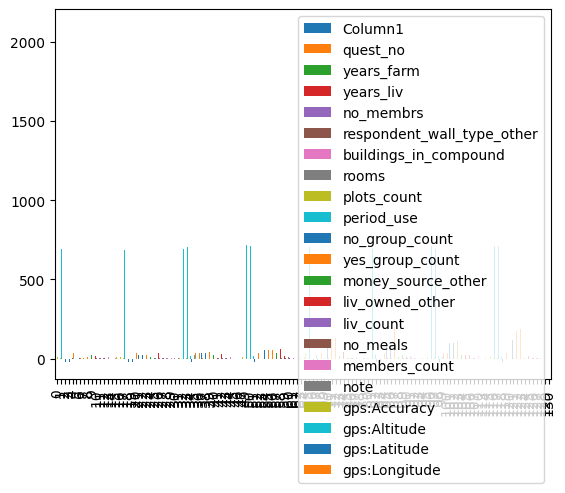

In [6]:
# Trying to create a basic plot with messy data--unreadable!!

df_SAFI.plot(kind = "bar")

<Axes: >

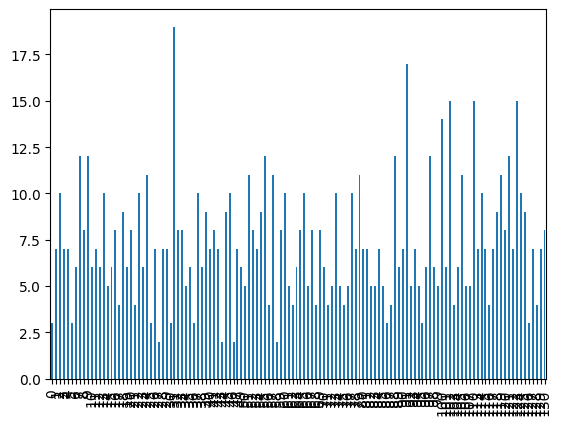

In [7]:
# Creating a bar graph of ONE COLUMN instead of the whole dataframe--still pretty messy...

df_SAFI["members_count"].plot(kind="bar")

<Axes: ylabel='Frequency'>

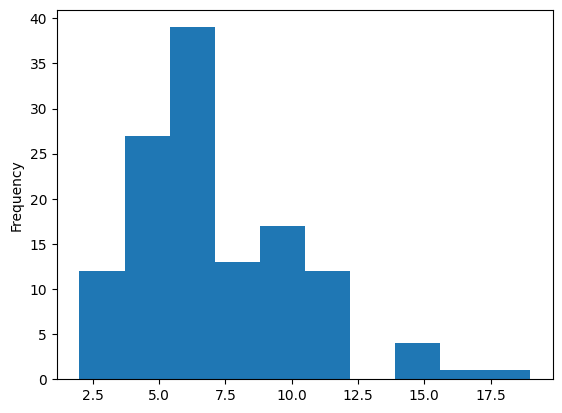

In [8]:
# Creating a histogram based on a **COLUMN** in a dataframe

df_SAFI['members_count'].plot(kind='hist')

In [9]:
# Grouping by roof type and getting the mean number of inhabitants for each roof type in the survey

roofs_mean = df_SAFI.groupby('respondent_roof_type')['members_count'].mean()

roofs_mean.head()


,members_count
respondent_roof_type,
grass,6.257143
mabatipitched,9.600000
mabatisloping,8.260870


<Axes: xlabel='respondent_roof_type'>

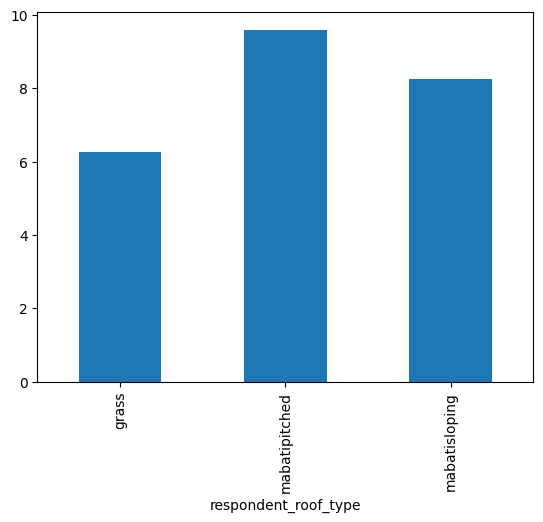

In [10]:
# Creating a bar graph for the mean number of inhabitants per roof type

roofs_mean.plot(kind='bar')

In [11]:
# Grouping by village and getting value counts for how many people live in each farm by village.

df_SAFI.groupby('village')['members_count'].value_counts()

village   members_count
Village1  7                10
          5                 7
          6                 7
          10                4
          3                 3
          11                3
          8                 2
          12                2
          2                 1
          4                 1
          9                 1
          14                1
          15                1
          17                1
          19                1
Village2  7                 9
          4                 6
          6                 6
          5                 5
          3                 4
          10                4
          8                 3
          9                 2
          15                2
          11                1
          12                1
Village3  8                 8
          4                 4
          5                 4
          7                 4
          2                 3
          6                 3
          9                 3
          10                3
          12                3
          11                2
          3                 1
Name: count, dtype: int64

array([<Axes: title={'center': 'Village1'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Village2'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Village3'}, ylabel='Frequency'>],
      dtype=object)

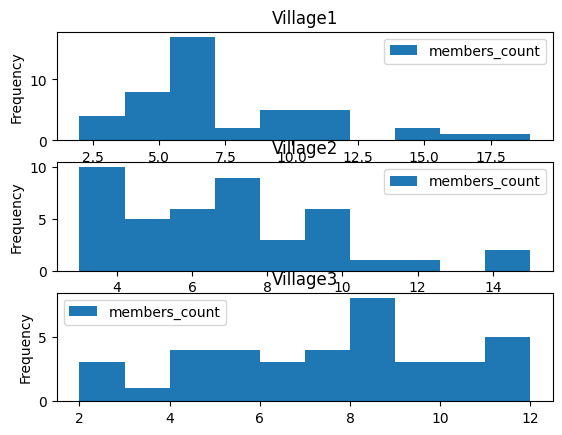

In [12]:
#Creating a GROUP of basic histograms, one per village, with values from the members_count column.

df_SAFI.plot(kind='hist', by='village', column='members_count')

,0
members_count,"Axes(0.125,0.11;0.775x0.77)"


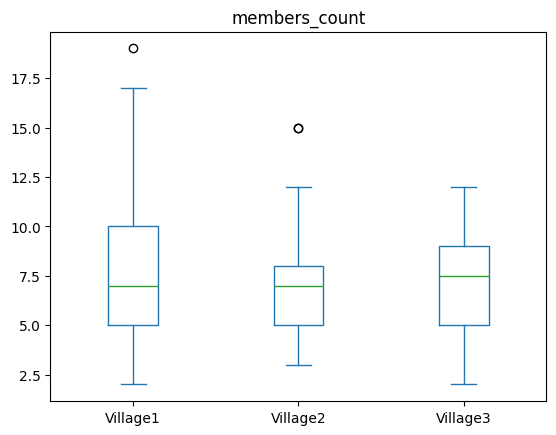

In [13]:
#Generate a boxplot of the members_count, grouped by village.

df_SAFI.plot(kind='box', by ='village', column=['members_count'])

##Combining Dataframes and Graphing

In [14]:
# Reading in the GDP Europe and Africa dataframes.

df_europe = pd.read_csv("/content/drive/MyDrive/TRIADS_workshops/workshop_data/gdp_europe.csv", index_col=0)

df_africa = pd.read_csv("/content/drive/MyDrive/TRIADS_workshops/workshop_data/gdp_africa.csv", index_col=0)


In [15]:
# Calculating the means per year for each country in each dataframe.

africa_means = df_africa.mean()

europe_means = df_europe.mean()

africa_means




,0
1952,1252.572466
1957,1385.236062
1962,1598.078825
1967,2050.363801
1972,2339.615674
1977,2585.938508
1982,2481.592960
1987,2282.668991
1992,2281.810333
1997,2378.759555


In [16]:
# Using concatenate to combine the two dataframes

mean_gdp = pd.concat([africa_means, europe_means], axis=1) # Using axis to stack on top when concatenating

mean_gdp.columns = ['Africa', 'Europe']

mean_gdp

,0,1
1952,1252.572466,5661.057435
1957,1385.236062,6963.012816
1962,1598.078825,8365.486814
1967,2050.363801,10143.823757
1972,2339.615674,12479.575246
1977,2585.938508,14283.979110
1982,2481.592960,15617.896551
1987,2282.668991,17214.310727
1992,2281.810333,17061.568084
1997,2378.759555,19076.781802


<Axes: >

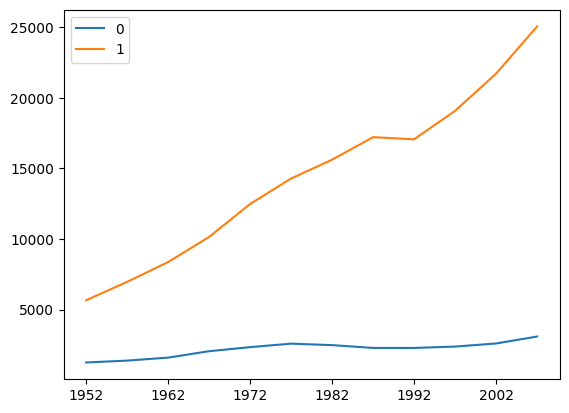

In [17]:
# Plotting an line graph from our combined dataframe of means

mean_gdp.plot(kind="line")